In [1]:
import pandas as pd
#!pip install mlxtend 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
dataset = pd.read_excel("transactions_by_dept.xlsx")

In [3]:
dataset.head()

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1


In [4]:
#Cleaning the dataset

dataset['Dept'] = dataset['Dept'].str.strip()
dataset.dropna(axis=0,subset=['POS Txn'],inplace = True)
dataset['POS Txn'] = dataset['POS Txn'].astype('str')

In [5]:
dataset.head()

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1


In [6]:
df = dataset.groupby(['POS Txn','Dept'])['Sales U'].sum().unstack().reset_index().fillna(0).set_index('POS Txn')

In [7]:
df.head()

Dept,0002:BARBER RETAIL,0009:FLORAL SERV/SUPPLIES,0012:LOCAL GIFTS/FOODS,0014:REPAIRS,0016:FINANCIAL SERVICES,0018:OTHER DIRECT SERVICE,0033:VENDING RETAIL,0056:SOUVENIR,0066:VENDING/AMUSEMENT MA,0071:BEAUTY RETAIL,...,0941:BEDDING,0961:GENERAL GROCERIES,0962:BEVERAGES,0965:PERISHABLES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO,0999:UNSCANNED ITEMS
POS Txn,,,,,,,,,,,,,,,,,,,,,
16120100160021008773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,2.0,0.0
16120100160021008774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16120100160021008775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16120100160021008776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16120100160021008777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [8]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = df.applymap(encode_units)

In [9]:
basket_sets.head()

Dept,0002:BARBER RETAIL,0009:FLORAL SERV/SUPPLIES,0012:LOCAL GIFTS/FOODS,0014:REPAIRS,0016:FINANCIAL SERVICES,0018:OTHER DIRECT SERVICE,0033:VENDING RETAIL,0056:SOUVENIR,0066:VENDING/AMUSEMENT MA,0071:BEAUTY RETAIL,...,0941:BEDDING,0961:GENERAL GROCERIES,0962:BEVERAGES,0965:PERISHABLES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO,0999:UNSCANNED ITEMS
POS Txn,,,,,,,,,,,,,,,,,,,,,
16120100160021008773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
16120100160021008774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16120100160021008775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16120100160021008776,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16120100160021008777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
frequent_itemsets = apriori(basket_sets, min_support=0.02,use_colnames=True)

In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0603:BEAUTY CARE),(0597:HEALTH AIDS),0.063953,0.096899,0.020349,0.318182,3.283636,0.014152,1.324548
1,(0597:HEALTH AIDS),(0603:BEAUTY CARE),0.096899,0.063953,0.020349,0.210000,3.283636,0.014152,1.184869
2,(0597:HEALTH AIDS),(0604:PERSONAL CARE),0.096899,0.072674,0.031008,0.320000,4.403200,0.023966,1.363714
3,(0604:PERSONAL CARE),(0597:HEALTH AIDS),0.072674,0.096899,0.031008,0.426667,4.403200,0.023966,1.575176
4,(0836:HOUSEHOLD CLEANING),(0597:HEALTH AIDS),0.076550,0.096899,0.029554,0.386076,3.984304,0.022137,1.471030


In [22]:
rule_30_confidence = rules[rules['confidence'] > 0.29]

In [26]:
rule_30_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0603:BEAUTY CARE),(0597:HEALTH AIDS),0.063953,0.096899,0.020349,0.318182,3.283636,0.014152,1.324548
2,(0597:HEALTH AIDS),(0604:PERSONAL CARE),0.096899,0.072674,0.031008,0.320000,4.403200,0.023966,1.363714
3,(0604:PERSONAL CARE),(0597:HEALTH AIDS),0.072674,0.096899,0.031008,0.426667,4.403200,0.023966,1.575176
4,(0836:HOUSEHOLD CLEANING),(0597:HEALTH AIDS),0.076550,0.096899,0.029554,0.386076,3.984304,0.022137,1.471030
5,(0597:HEALTH AIDS),(0836:HOUSEHOLD CLEANING),0.096899,0.076550,0.029554,0.305000,3.984304,0.022137,1.328704
9,(0961:GENERAL GROCERIES),(0962:BEVERAGES),0.047965,0.122578,0.020833,0.434343,3.543418,0.014954,1.551158
14,(0983:WINE),(0982:SPIRITS),0.092539,0.152132,0.037306,0.403141,2.649948,0.023228,1.420551
16,(0984:BEER),(0982:SPIRITS),0.063953,0.152132,0.024225,0.378788,2.489867,0.014495,1.364861


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns1
import numpy as np

In [24]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.figure(figsize=(150,150)) 
  plt.show()
  

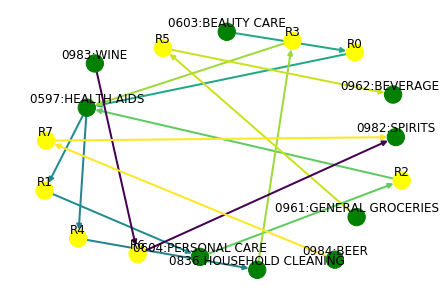

<Figure size 10800x10800 with 0 Axes>

In [27]:
#identify rules with 50% confidence

draw_graph (rule_30_confidence, 8) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
